In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jrnai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
thaiVilla = pd.read_excel('EatalyReview.xlsx').drop(columns = ['Unnamed: 0'])
thaiVilla['Date'] = pd.to_datetime(thaiVilla['Date'])

In [3]:
thaiVilla

,Friends,Name,Rating,Review,UserReviews,Photos,Date
0,73,Jill L.,5,I had never been to an Eataly before so this w...,156,222,2021-10-13
1,3210,Tiffany D.,3,Smaller than the one at Flatiron seemingly or ...,2630,9554,2021-10-27
2,2013,Giacomo C.,3,I've always visited the other location by the ...,1383,3762,2021-10-01
3,131,Warren D.,5,I've walked through the Eataly on the Las Vega...,588,476,2021-09-28
4,304,Jamie W.,4,This is such a fun place to just walk around a...,517,830,2021-08-23
...,...,...,...,...,...,...,...
1020,1,Michele A.,4,Had dinner at Pizza & Pasta and it was yummy! ...,67,3,2017-11-21
1021,0,R B.,2,We ate at the Italian pasta/pizza restaurant. ...,4,0,2016-09-18
1022,197,Brittney P.,2,Walking around near closing in the Gelato sect...,1,0,2016-08-19
1023,2,Stanley S.,4,The concept s very cool and the food very good...,391,0,2017-10-27


In [4]:
thaiMenu = {'Meatballs',
 'Side Salad - Insalatina',
 'Prosciutto and Mozzarella',
 'Housemade Focaccia',
 'Burrata',
 'Prosciutto San Daniele',
 'Soppressata - Sweet',
 'Soppressata - Spicy',
 'Housemade Focaccia -Black Truffle',
 'Housemade Focaccia - Black Pepper and Cheese',
 'Otto Tondo Bread',
 'Bruschetta Ricotta e Tartufo',
 'Chickpea Salad',
 'Kale and Quinoa Salad',
 'Gem Lettuce and Tuna Salad',
 'Autunnale',
 'Agnolotti del Plin',
 'Spaghetti al Pomodoro',
 'Bucatini allAmatriciana',
 'Tagliatelle with Bolognese Rag',
 'Classic Lasagna',
 'Ravioli di Zucca',
 'Vesuvio with Sausage and Rapini',
 'Pappardelle al Ragu di Funghi e Tartufo',
 'Marinara Pizza',
 'Margherita Verace Pizza',
 'Four Cheese (Quattro Formaggi) Pizza',
 'Spicy Salami (Massese) Pizza',
 'Italian Sausage (Salsicciota) Pizza',
 'Squash and Pancetta Pizza (Zuccarella)',
 'Calzone Classico',
 'Burrata and Broccoli Rabe Pizza (Burratona)',
 'Eggplant Parmigiana Pizza',
 'Capricciosa Pizza',
 'Classic Tiramisu',
 'Cioccolato',
 'Profiteroles',
 'Panna Cotta with Fresh Berries',
 'Loacker Quadratini (8.8 oz.)',
 'Bjorn Qorn',
 'Lurisia Still Water (16.9 oz.)',
 'Lurisia Sparkling Water (16.9 oz.)',
 'Lurisia Still Water (33.8 oz.)',
 'Lurisia Sparkling Water (33.8 oz.)',
 'Lurisia Gazzosa (9.3 oz.)',
 'Mole Cola (12.8 oz.)',
 'Mole Cola Senza (12.8 oz.)',
 'Niasca Limonata (8.45 oz.)',
 'Lurisia Chinotto (9.3 oz.)'}

# Distribution of the Friends Feature

In [5]:
friends = thaiVilla['Friends']

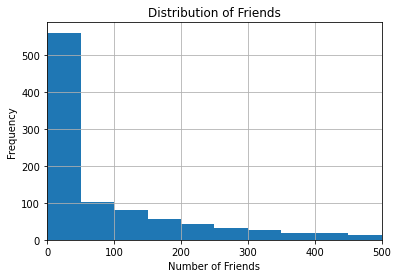

In [6]:
friends.hist(bins = 100)
plt.xlabel('Number of Friends')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 500)
plt.title('Distribution of Friends')
#plt.figure(figsize=(20,20))
plt.show()

In [7]:
friends.describe()

count    1025.000000
mean      171.891707
std       464.020982
min         0.000000
25%         1.000000
50%        38.000000
75%       177.000000
max      5000.000000
Name: Friends, dtype: float64

# Distribution of the Ratings Feature

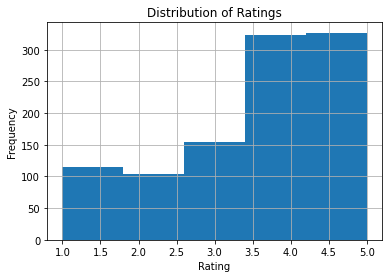

In [8]:
Ratings = thaiVilla['Rating']
Ratings.hist(bins = 5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
#plt.xlim(xmin=0, xmax = 150)
plt.title('Distribution of Ratings')
#plt.figure(figsize=(20,20))
plt.show()

In [9]:
Ratings.describe()

count    1025.000000
mean        3.628293
std         1.322647
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

# Distribution of the UserReviews Feature

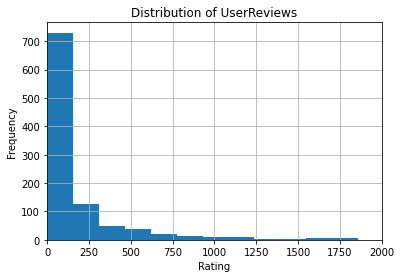

In [10]:
UserReviews = thaiVilla['UserReviews']
UserReviews.hist(bins = 50)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 2000)
plt.title('Distribution of UserReviews')
#plt.figure(figsize=(20,20))
plt.show()

In [11]:
UserReviews.describe()

count    1025.000000
mean      203.434146
std       443.129410
min         1.000000
25%        18.000000
50%        58.000000
75%       190.000000
max      7738.000000
Name: UserReviews, dtype: float64

# Distribution of the Photos Feature

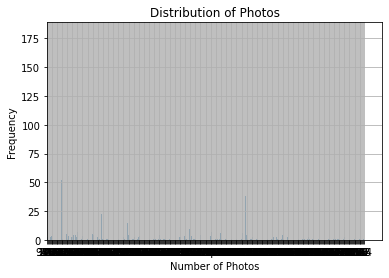

In [12]:
Photos = thaiVilla['Photos']
Photos.hist(bins = 1000)
plt.xlabel('Number of Photos')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 400)
plt.title('Distribution of Photos')
#plt.figure(figsize=(20,20))
plt.show()

In [13]:
Photos.describe()

count     1025
unique     379
top          0
freq       180
Name: Photos, dtype: object

# Time Series of Ratings vs Time

In [14]:
import datetime
import random
import matplotlib.pyplot as plt

In [15]:
sortedDf = thaiVilla.sort_values(['Date'], ascending=True)

In [16]:
sortedDf = pd.DataFrame(sortedDf.groupby("Date")["Rating"].mean())

In [17]:
x = sortedDf.index
y = sortedDf['Rating']

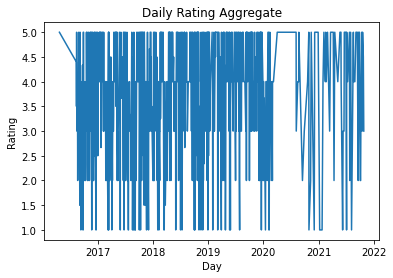

<Figure size 3600x1080 with 0 Axes>

In [18]:
plt.plot(x,y)
plt.title('Daily Rating Aggregate')
plt.ylabel('Rating')
plt.xlabel('Day')
plt.figure(figsize=(50,15))
plt.show()

In [19]:
sortedDf = thaiVilla.sort_values(['Date'], ascending=True)

In [20]:
monthlyRating = pd.DataFrame(sortedDf.groupby([sortedDf['Date'].dt.year.rename('year'), sortedDf['Date'].dt.month_name().rename('month')])['Rating'].mean().reset_index())

In [21]:
monthlyRating['my'] = monthlyRating['year'].astype(str) + ' ' + monthlyRating['month'].astype(str)

In [22]:
monthlyRating

,year,month,Rating,my
0,2016,April,5.000000,2016 April
1,2016,August,3.387755,2016 August
2,2016,December,3.214286,2016 December
3,2016,November,3.846154,2016 November
4,2016,October,3.400000,2016 October
...,...,...,...,...
58,2021,June,3.400000,2021 June
59,2021,March,4.600000,2021 March
60,2021,May,4.500000,2021 May
61,2021,October,3.600000,2021 October


In [23]:
x = monthlyRating['my']
y = monthlyRating['Rating']

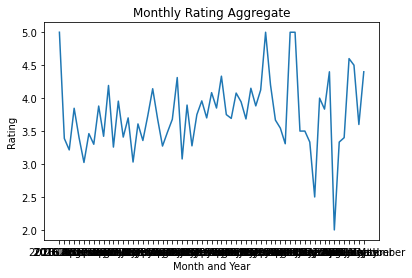

<Figure size 3600x1080 with 0 Axes>

In [24]:
plt.plot(x,y)
plt.title('Monthly Rating Aggregate')
plt.ylabel('Rating')
plt.xlabel('Month and Year')
plt.figure(figsize=(50,15))
plt.show()

# Food Occurences in Menu

In [25]:
lst = []
for i, row in thaiVilla.iterrows():
    count = 0
    s = row.Review.lower().replace(' ', '')
    for i in thaiMenu:
        i = i.lower()
        if i.replace(' ', '') in s:
            count += 1
    lst.append(count)
    
#     print(i, row)
#     count = 0
#     s = row.Review.lower()
#     s = s.plit()
#     seven = s[:7]
#     six = s[:6]
#     five = s[:5]
#     four = s[:4]
#     three = s[:3]
#     two = s[:2]
#     for j in s:
#         if j in thaiMenu:
#             count += 1
#     for j in s:
#         if seven in s or sixe.....:
#             count += 1
#         seven = seven[1:] + [j]
#         ...
#     lst.append(count)
#     break

In [26]:
thaiVilla['Food Occurs'] = lst

# Catching Sentiment in Reviews

In [27]:
positive = {'best', 'amazing', 'love', 'good', 'perfect', 'fantastic', 'beautiful', 'yummy', 'delicious'}
negative = {'horrible', 'bad', 'gross', 'hate', 'disgusting', 'dread', 'terrible'}

In [28]:
plst = []
nlst = []
for i, row in thaiVilla.iterrows():
    gcount = 0
    ncount = 0
    s = row.Review.lower().replace(' ', '')
    for i in positive:
        if i in s:
            gcount += 1
    for i in negative:
        if i in s:
            ncount += 1     
    plst.append(gcount)
    nlst.append(ncount)

In [29]:
thaiVilla['Positive Occurs'] = plst
thaiVilla['Negative Occurs'] = nlst

In [30]:
thaiVilla

,Friends,Name,Rating,Review,UserReviews,Photos,Date,Food Occurs,Positive Occurs,Negative Occurs
0,73,Jill L.,5,I had never been to an Eataly before so this w...,156,222,2021-10-13,0,1,0
1,3210,Tiffany D.,3,Smaller than the one at Flatiron seemingly or ...,2630,9554,2021-10-27,0,1,0
2,2013,Giacomo C.,3,I've always visited the other location by the ...,1383,3762,2021-10-01,0,1,1
3,131,Warren D.,5,I've walked through the Eataly on the Las Vega...,588,476,2021-09-28,0,2,0
4,304,Jamie W.,4,This is such a fun place to just walk around a...,517,830,2021-08-23,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1020,1,Michele A.,4,Had dinner at Pizza & Pasta and it was yummy! ...,67,3,2017-11-21,0,5,0
1021,0,R B.,2,We ate at the Italian pasta/pizza restaurant. ...,4,0,2016-09-18,0,3,0
1022,197,Brittney P.,2,Walking around near closing in the Gelato sect...,1,0,2016-08-19,0,0,0
1023,2,Stanley S.,4,The concept s very cool and the food very good...,391,0,2017-10-27,0,1,0


# Correlation Heatmap

<AxesSubplot:>

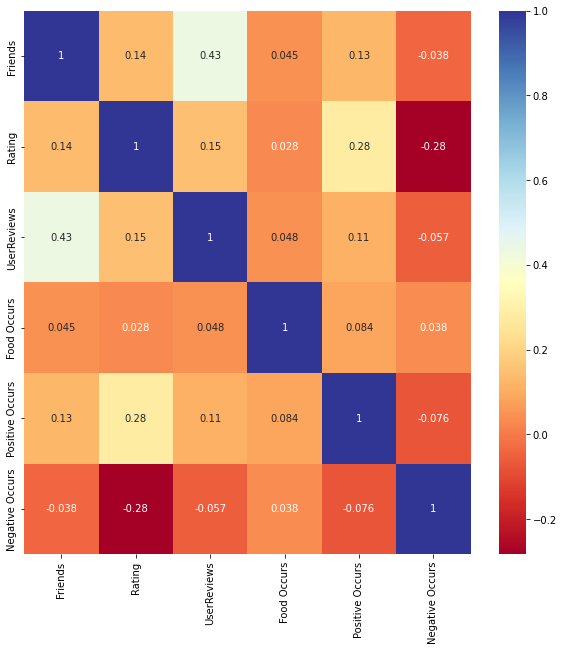

In [31]:
correlation = thaiVilla[['Friends', 'Rating', 'UserReviews', 'Photos', 'Food Occurs', 'Positive Occurs', 'Negative Occurs']]

corr = correlation.corr(method='kendall')
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="RdYlBu")

# Positive Sentiment Analysis

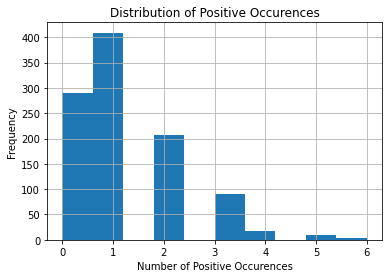

In [32]:
posOcc = thaiVilla['Positive Occurs']
posOcc.hist(bins = 10)
plt.xlabel('Number of Positive Occurences')
plt.ylabel('Frequency')
# plt.xlim(xmin=0, xmax = 400)
plt.title('Distribution of Positive Occurences')
#plt.figure(figsize=(20,20))
plt.show()

# Negative Sentiment Analysis

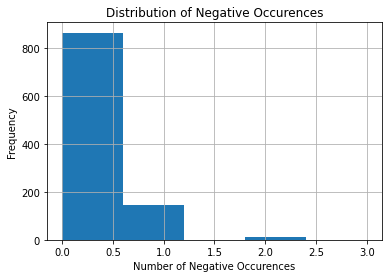

In [33]:
negOcc = thaiVilla['Negative Occurs']
negOcc.hist(bins = 5)
plt.xlabel('Number of Negative Occurences')
plt.ylabel('Frequency')
# plt.xlim(xmin=0, xmax = 400)
plt.title('Distribution of Negative Occurences')
#plt.figure(figsize=(20,20))
plt.show()

In [35]:
score_df = pd.DataFrame(columns = ['Menu Item', 'Positive', 'Negative', 'Neutral', 'Score'])

for item in thaiMenu:
    item = item.lower()
    pos = 0
    neg = 0
    neu = 0
    rating = 0
    for review in thaiVilla['Review']:
        review = review.lower()
        sentences_with_item = []
        sents = nltk.tokenize.sent_tokenize(review)
        for sent in sents:
           if sent.find(item) != -1:
                sentences_with_item.append(sent)
        for sent in sentences_with_item:
           # print(sent)
            score = sid.polarity_scores(sent)
            #print(score)
            rating += score['compound']
            if score['compound'] > 0:
                pos += 1
            elif score['compound'] < 0:
                neg += 1
            else:
                neu += 1
    total_mentions = pos + neg + neu
    if total_mentions > 10:
        #pct_pos = pos / total_mentions
        avg = rating / total_mentions

        score_df = score_df.append({'Menu Item' : item, 'Positive' : pos, 'Negative' : neg, 'Neutral' : neu, 'Score': avg},
                ignore_index = True)
score_df = score_df.sort_values(by=['Score'])
print('WORST')
for index, row in score_df.head(3).iterrows():
    print(row['Menu Item'] + ': ' + str(row['Score']))
print()
print('BEST')
for index, row in score_df.tail(3).iterrows():
    print(row['Menu Item'] + ': ' + str(row['Score']))
    # print(item)
    # print('pos: ' + str(pos))
    # print('neg ' + str(neg))
    # print()
score_df







WORST
burrata: 1.0

BEST
burrata: 1.0


,Menu Item,Positive,Negative,Score
0,burrata,15,0,1.0
